# STOR 120 - Homework 3: Table Manipulation and Visualization

**Reading**: 
* [Visualization](https://www.inferentialthinking.com/chapters/07/Visualization.html)

Please complete this notebook by filling in the cells provided. 

**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

**Deadline:**

This assignment is due Friday, September 9th at 5:00pm. Late work will penalized as stated in the syllabus.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.1.** The data are in a CSV file called `unemployment2022.csv`.  Load that file into a table called `unemployment2022`.

<!--
BEGIN QUESTION
name: q1_1
-->

In [6]:
unemployment2022 = Table.read_table("unemployment2022.csv")
unemployment2022

DATE,NEI,NEI-PTER
1/1/1994,10.0072,11.0736
2/1/1994,9.83318,10.9887
3/1/1994,9.72693,10.9415
4/1/1994,9.59373,10.7789
5/1/1994,9.38267,10.6046
6/1/1994,9.37588,10.5891
7/1/1994,9.31817,10.4796
8/1/1994,9.26762,10.3866
9/1/1994,9.17775,10.2857
10/1/1994,9.10318,10.2432


**Question 1.2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

<!--
BEGIN QUESTION
name: q1_2
-->

In [11]:
by_nei = unemployment2022.sort("NEI", descending = True)
by_nei_pter = unemployment2022.sort("NEI-PTER", descending = True)

**Question 1.3.** Use `take` to make a table containing the data for the ten months when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a month.

<!--
BEGIN QUESTION
name: q1_3
-->

In [10]:
greatest_nei = by_nei.take(np.arange(0, 10, 1))
greatest_nei

DATE,NEI,NEI-PTER
4/1/2020,15.5316,17.7847
5/1/2020,14.3125,16.4133
6/1/2020,12.5481,14.2853
7/1/2020,11.9463,13.4875
10/1/2009,10.9794,12.8786
6/1/2009,10.9399,12.8703
5/1/2009,10.8998,12.8307
12/1/2009,10.8989,12.8045
9/1/2009,10.8657,12.7255
11/1/2009,10.8352,12.7394


**Question 1.4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each month.  (The first element of the array should correspond to the first row of `unemployment2022`, and so on.)

*Note:* Use the original `unemployment2022` table for this.

<!--
BEGIN QUESTION
name: q1_4
-->

In [22]:
pter = unemployment2022.column("NEI-PTER") - unemployment2022.column("NEI")
pter

array([ 1.06640315,  1.1555059 ,  1.21461594,  1.18515659,  1.22193715,
        1.21320817,  1.16137951,  1.11902353,  1.1079541 ,  1.14004119,
        1.15059322,  1.11741765,  1.1936827 ,  1.08078857,  1.10352353,
        1.09155621,  1.13529982,  1.12195201,  1.13580941,  1.14525877,
        1.14948261,  1.12169917,  1.13600252,  1.10907887,  1.04289838,
        1.08356044,  1.09588158,  1.08299487,  1.08105899,  1.0717145 ,
        1.10687018,  1.09920007,  1.0839267 ,  1.08325863,  1.00770767,
        1.08005243,  1.06455172,  1.03466896,  1.01147973,  1.04367644,
        0.99792479,  0.98237632,  1.01387727,  0.99778134,  0.978638  ,
        0.97798584,  0.97286781,  0.94288115,  0.97997807,  0.94143327,
        0.93888594,  0.881706  ,  0.91740208,  0.92131223,  0.94838083,
        0.86785843,  0.83938366,  0.83978036,  0.80584215,  0.82467541,
        0.84454036,  0.8264696 ,  0.85579255,  0.79172804,  0.82975301,
        0.81859262,  0.82625392,  0.80134907,  0.7919441 ,  0.76

**Question 1.5.** Add `pter` as a column to `unemployment2022` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

<!--
BEGIN QUESTION
name: q1_5
-->

In [64]:
by_pter = unemployment2022.with_column("PTER", pter).sort("PTER", descending = True)
by_pter

DATE,NEI,NEI-PTER,PTER
4/1/2020,15.5316,17.7847,2.25314
5/1/2020,14.3125,16.4133,2.10079
3/1/2009,10.6015,12.5403,1.93874
3/1/2010,10.7956,12.7329,1.93732
7/1/2009,10.7791,12.7112,1.93213
5/1/2009,10.8998,12.8307,1.93093
6/1/2009,10.9399,12.8703,1.93031
8/1/2009,10.7941,12.7139,1.91972
4/1/2010,10.6456,12.5646,1.91897
12/1/2009,10.8989,12.8045,1.9056


**Question 1.6.** 

Create a line plot of the PTER over time. 

To do this, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

<!--
BEGIN QUESTION
name: q1_6
-->

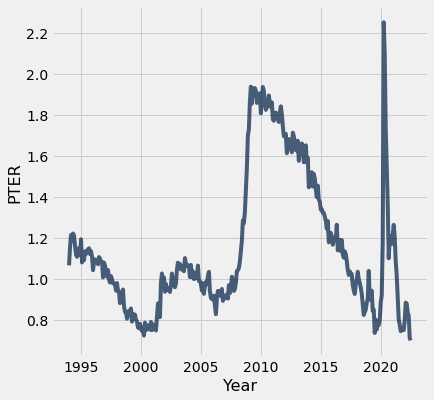

In [27]:
year = 1994 + np.arange(by_pter.num_rows)/12
pter_over_time = unemployment2022.with_columns("Year", year, "PTER", pter)
pter_over_time.plot("Year", "PTER")

**Question 1.7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2009)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

<!--
BEGIN QUESTION
name: q1_7
-->

In [28]:
highPTER = True

## 2. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2020 and July 1, 2021. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/state/totals/NST-EST2021-alldata.csv).

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [29]:
# Don't change this cell; just run it.
pop = Table.read_table('NST-est2021-alldata.csv').where('SUMLEV', 40).select([1, 4, 6, 7, 10, 12, 20, 22])
pop = pop.relabeled('POPESTIMATE2020', '2020').relabeled('POPESTIMATE2021', '2021')
pop = pop.relabeled('BIRTHS2020', 'BIRTHS').relabeled('DEATHS2020', 'DEATHS')
pop = pop.relabeled('NETMIG2020', 'MIGRATION').relabeled('RESIDUAL2020', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2020,2021,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"5,024,803","5,039,877","13,410","16,148","3,337",-75
4,Alaska,"732,441","732,673","2,407","1,384","-2,012",39
4,Arizona,"7,177,986","7,276,316","18,036","18,340","26,791",-3
3,Arkansas,"3,012,232","3,025,891","8,554","9,449","1,618",-15
4,California,"39,499,738","39,237,836","104,957","81,738","-62,562",858


**Question 2.1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

<!--
BEGIN QUESTION
name: q2_1
-->

In [39]:
us_birth_rate = pop.column("BIRTHS")/pop.column("2020")
us_birth_rate

array([ 0.00266876,  0.00328627,  0.00251268,  0.00283975,  0.00265716,
        0.00263506,  0.00230261,  0.0024277 ,  0.00310828,  0.00234776,
        0.00274693,  0.00275637,  0.00298359,  0.00266495,  0.0028323 ,
        0.00289557,  0.00287886,  0.00276557,  0.00286743,  0.00217063,
        0.0027288 ,  0.00240864,  0.00263626,  0.00287849,  0.00279924,
        0.00283663,  0.00256216,  0.00310943,  0.00263096,  0.00211417,
        0.00260568,  0.00261952,  0.00266634,  0.00267845,  0.00338656,
        0.00273871,  0.00293057,  0.00245783,  0.00247998,  0.00226595,
        0.00259983,  0.00324766,  0.00275357,  0.00302478,  0.00354117,
        0.00214009,  0.00269195,  0.00273061,  0.00244888,  0.00265243,
        0.00284617,  0.00138624])

**Question 2.2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1.0%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

<!--
BEGIN QUESTION
name: q2_2
-->

In [38]:
migration_rates = pop.with_column("migration rate", abs(pop.column("MIGRATION") / pop.column("2020") * 100))
movers = migration_rates.where("migration rate", are.above(.01)).num_rows
movers

49

**Question 2.3.** Assign `south_births` to the total number of births that occurred in region 3 (the Southern US). 


<!--
BEGIN QUESTION
name: q2_3
-->

In [40]:
south_births = sum(pop.where("REGION", are.equal_to(3)).column("BIRTHS"))
south_births

345546

**Question 2.4.** Assign `less_than_NC_births` to the number of states that had a total number of births that was smaller than the *total number of births in North Carolina* during this time interval.

<!--
BEGIN QUESTION
name: q2_4
-->

In [43]:
less_than_NC_births = pop.where("2021", are.below(south_births)).num_rows
less_than_NC_births

0

**Question 2.5.** 

In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.

<!--
BEGIN QUESTION
name: q2_5
-->

In [44]:
visualization = 2

**Question 2.6.** 

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

<!--
BEGIN QUESTION
name: q2_6
manual: true
-->
<!-- EXPORT TO PDF -->

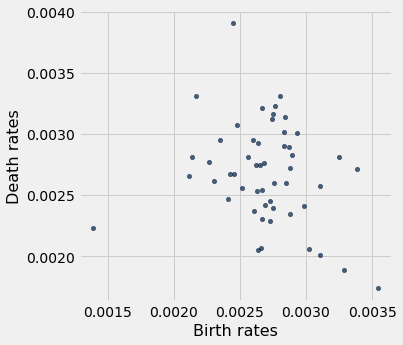

In [46]:
death_rate = (pop.column("DEATHS"))/ (pop.column("2020"))
birth_rate = (pop.column("BIRTHS"))/ (pop.column("2020"))
birth_death = pop.with_columns("Death rates", death_rate, "Birth rates", birth_rate)
birth_death.scatter("Birth rates", "Death rates")

**Question 2.7.** `True` or `False`: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. 

<!--
BEGIN QUESTION
name: q2_7
-->

In [47]:
assoc = False

## 3. Marginal Histograms


Consider the following scatter plot: 

![](hw03-scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given two histograms, each of which corresponds to either column `x` or column `y`. 

**Histogram A:** 
![](hw03-var1.png)


**Histogram B:** 
![](hw03-var2.png)

**Question 3.1.** Suppose we run `t.hist('y')`. Which histogram does this code produce? Assign `histogram_column_y` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [55]:
histogram_column_y = 1

**Question 3.2.** State at least one reason why you chose the histogram from Question 1. Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 3.3.** Suppose we run `t.hist('x')`. Which histogram does this code produce? `Assign histogram_column_x` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_3
manual: false
-->

In [56]:
histogram_column_x = 2

**Question 3.4.** State at least one reason why you chose the histogram from Question 3.  Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 4. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

In [49]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 4.1.** Produce histograms of all ride times in Boston using the given bins. 

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->
<!-- EXPORT TO PDF -->

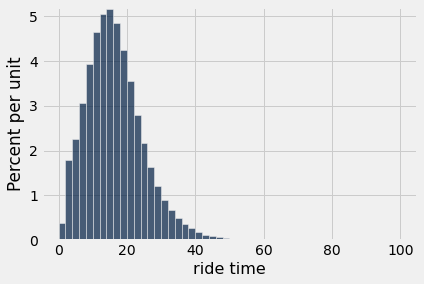

In [50]:
equal_bins = np.arange(0, 101, 2)
boston.hist("ride time", bins = equal_bins)

# Don't delete the following line!
plots.ylim(0, 0.052);

**Question 4.2.** Now, produce histograms of all ride times in Manila using the given bins.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->
<!-- EXPORT TO PDF -->

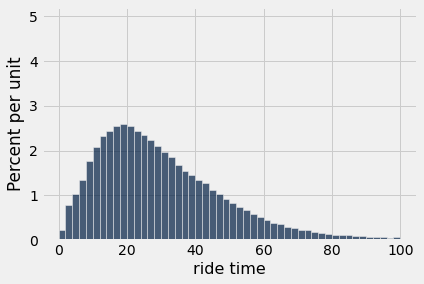

In [52]:
manila.hist("ride time", bins= equal_bins)

# Don't delete the following line!
plots.ylim(0, 0.052);

**Question 4.3.** Assign `boston_under_6` and `manila_under_6` to the percentage of rides that are less than 6 minutes in their respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables, numbers, and mathematical operations. You should not access the tables boston and manila in any way.

<!--
BEGIN QUESTION
name: q4_3
manual: false
-->

In [53]:
boston_under_2_height = 0.3765
manila_under_2_height = 0.215
boston_2_to_under_4_height = 1.7995
manila_2_to_under_4_height = 0.77575
boston_4_to_under_6_height = 2.25975
manila_4_to_under_6_height = 0.9965

boston_under_6 = (.3765 * 2) + (1.7995 * 2) + (2.25975 * 2)
manila_under_6 = (.215 * 2) + (.77575 * 2) + (.9965 * 2)

round(boston_under_6, 2), round(manila_under_6, 2)

(8.87, 3.97)

**Question 4.4.** Let's take a closer look at the distribution of ride times in Manila. Assign `manila_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time 

1:  0-20 minutes  
2: 20-40 minutes  
3: 40-60 minutes  
4: 60-80 minutes  

*Hint:* The median of a sorted list has half of the list elements to its left, and half to its right

<!--
BEGIN QUESTION
name: q4_4
manual: false
-->

In [54]:
manila_median_bin = 2
manila_median_bin

2

**Question 4.5.** What is the main difference between the two histograms. What might be causing this?

**Hint:** Try thinking about external factors that may be causing the difference!

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->
<!-- EXPORT TO PDF -->

Manila ride times are higher. This may be because places are not as close to each other as it is in a city such as a Boston. 